<a href="https://colab.research.google.com/github/kashishthakur26/MLprojects/blob/main/Liver_Disease_Patient_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Liver patient prediction

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### import the dataset

In [2]:
liver_data = pd.read_csv("/content/drive/MyDrive/Colab-notebooks/Indian Liver Patient Dataset (ILPD).csv")

In [3]:
liver_data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
### renaming the columns
liver_data.columns = ["Age","Gender","Total_Bilirubin","Direct_Bilirubin",
                      "Alkaline_Phosphotase","Alanine_Aminotransferase","Aspartate_Aminotransferase","Total_protiens",
                      "Albumin","Albumin_Globulin_Ratio","Target"]

In [5]:
liver_data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_protiens,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:
liver_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_protiens,Albumin,Albumin_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
liver_data.isna().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alanine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_protiens                False
Albumin                       False
Albumin_Globulin_Ratio         True
Target                        False
dtype: bool

In [8]:
liver_data = liver_data.dropna()

In [9]:
liver_data["Target"].value_counts()

1    414
2    165
Name: Target, dtype: int64

### Check for duplicate values

In [10]:
print(liver_data.duplicated().sum())
liver_data[liver_data.duplicated()]

13


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_protiens,Albumin,Albumin_Globulin_Ratio,Target
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


## Data visualization and analysis

In [11]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 34.4 MB/s eta 0:00:00


In [12]:
import sweetviz as sv

In [13]:
liver_data_univar_rpt = sv.analyze(liver_data)

                                             |          | [  0%]   00:00 -> (? left)

In [14]:
liver_data_univar_rpt.show_notebook()

#### Analysis via Boxplot

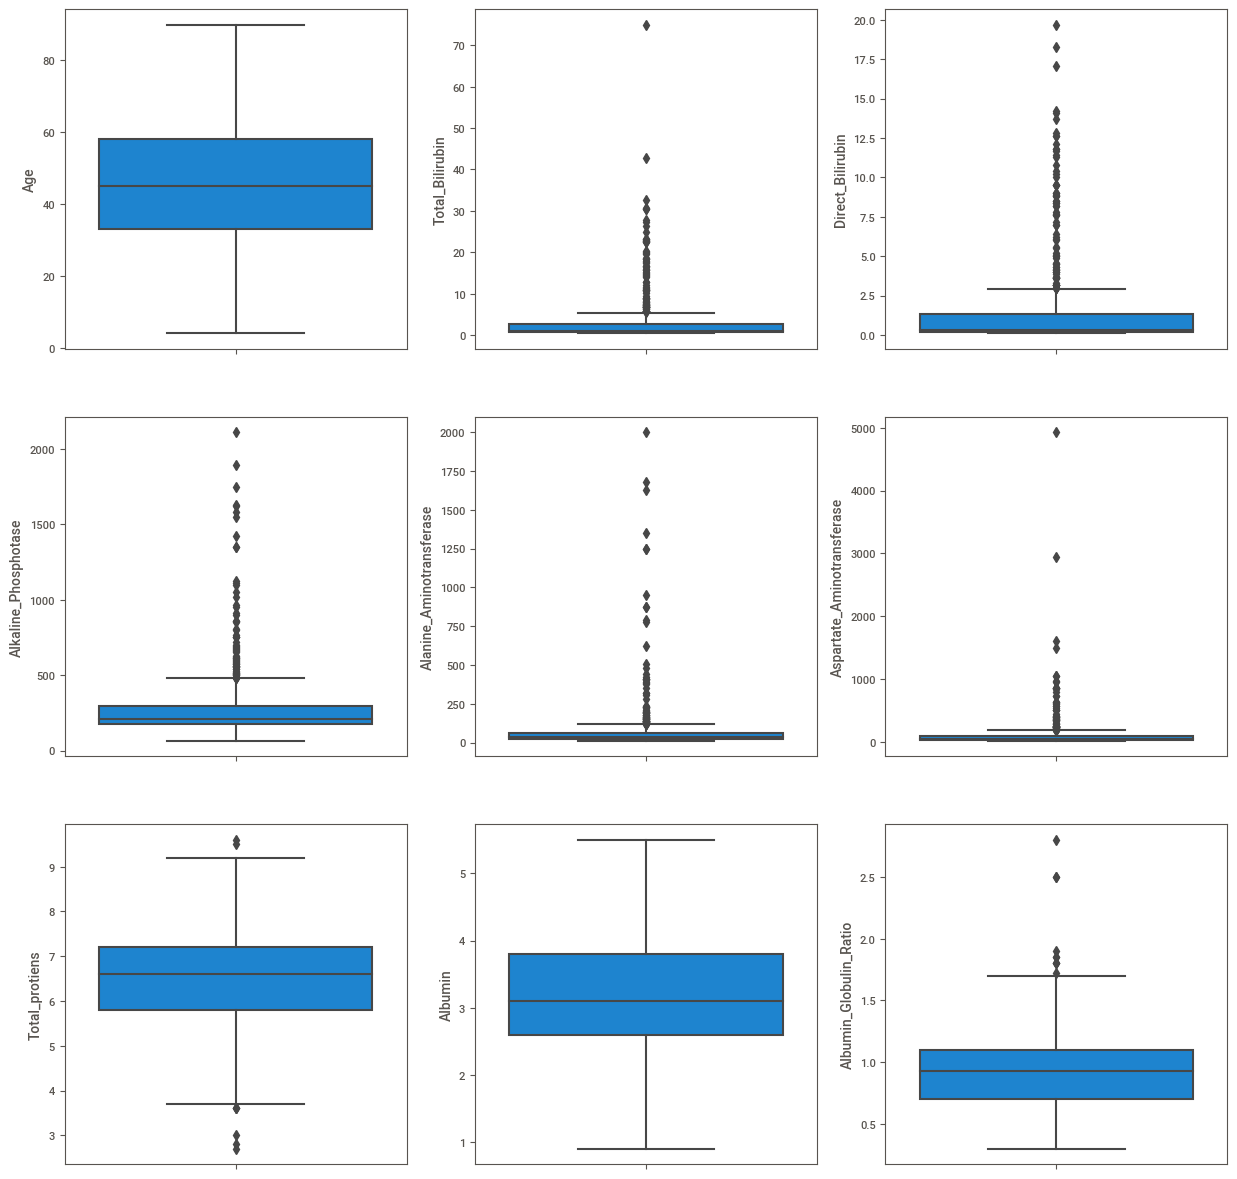

In [15]:
plt.figure(figsize=(15,15))
plt_num = 1
liver_data_num = liver_data.columns
liver_data_num = liver_data_num.drop(['Gender',"Target"])

for column in liver_data_num:
  if plt_num <=9:
    plt.subplot(3,3,plt_num)
    sns.boxplot(y=liver_data[column])
  plt_num+=1

plt.show()

#### Bivariate analysis

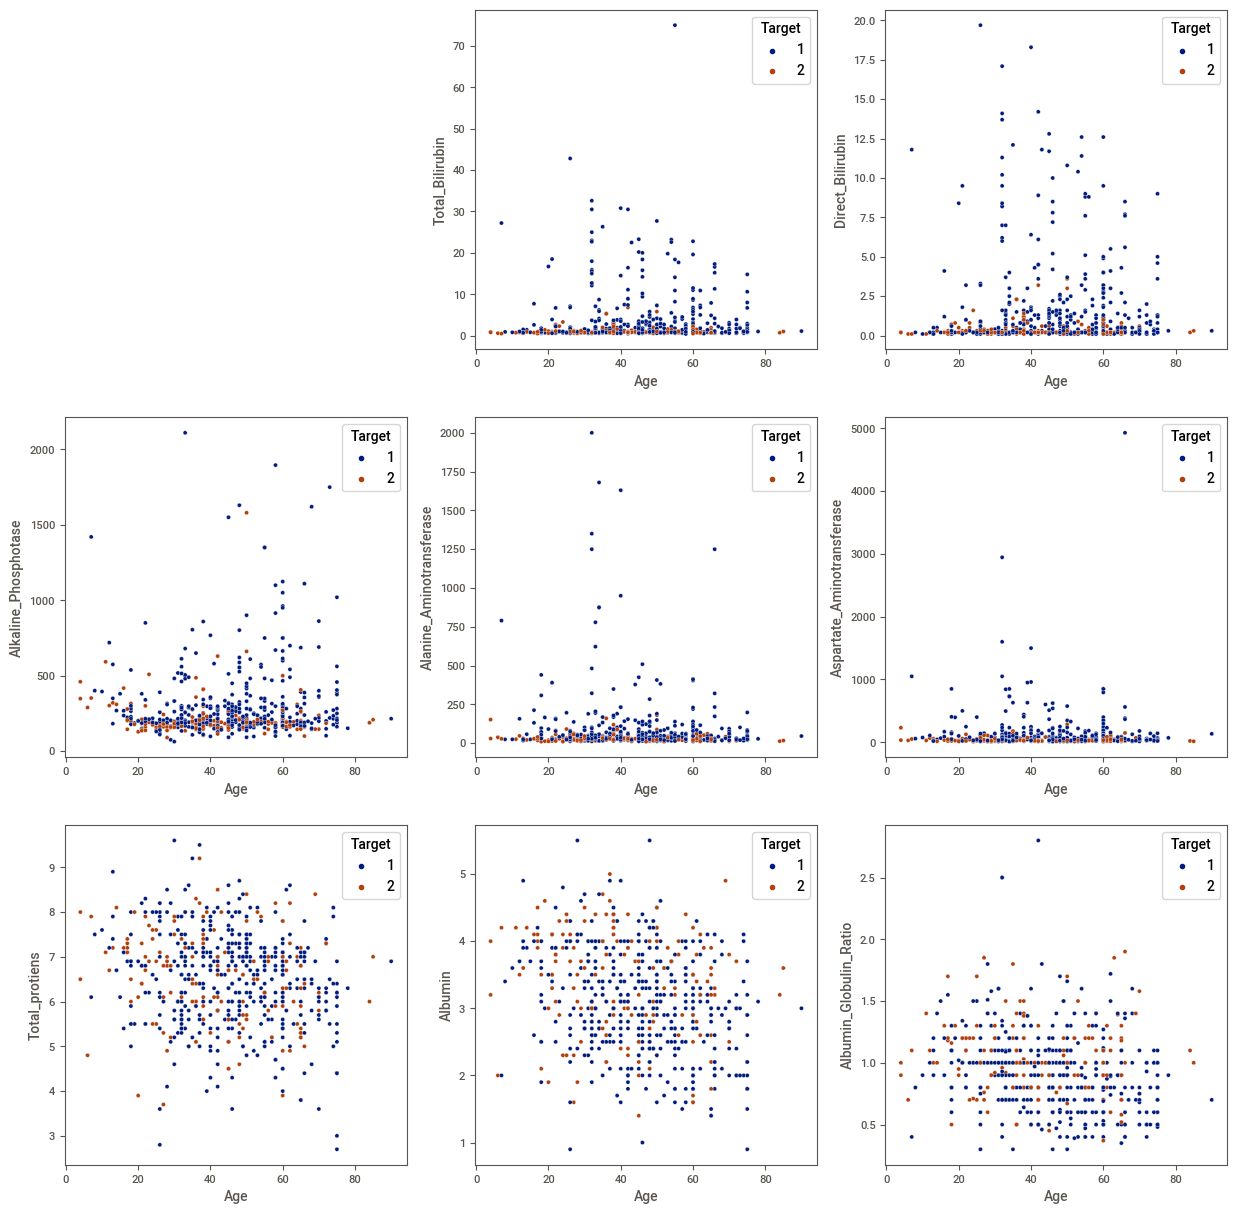

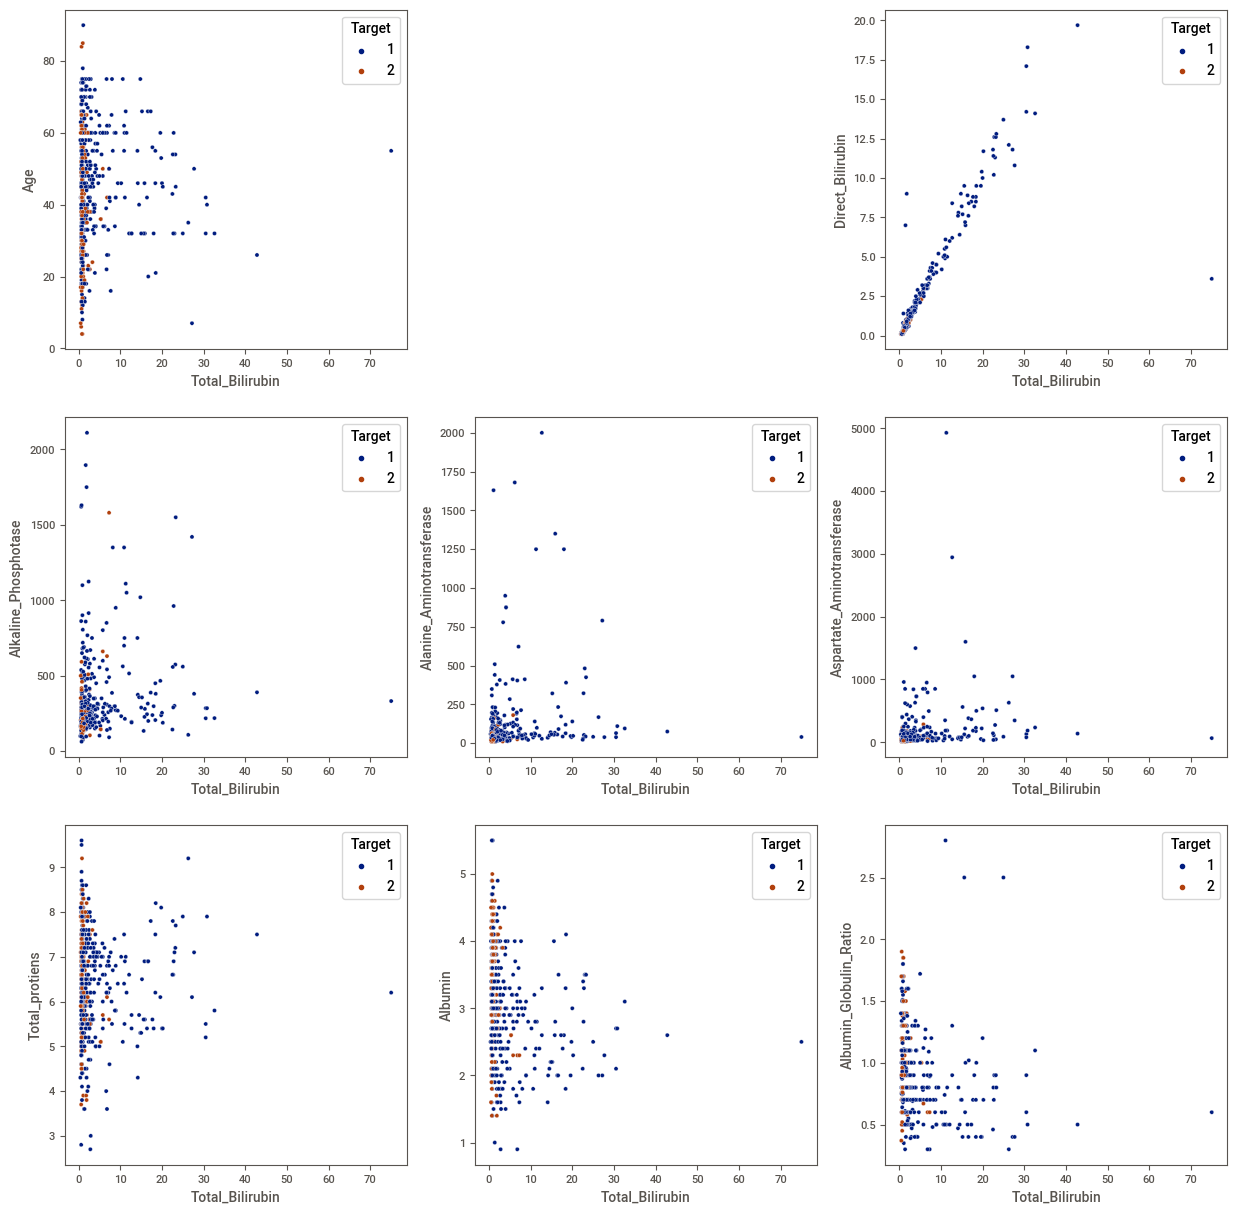

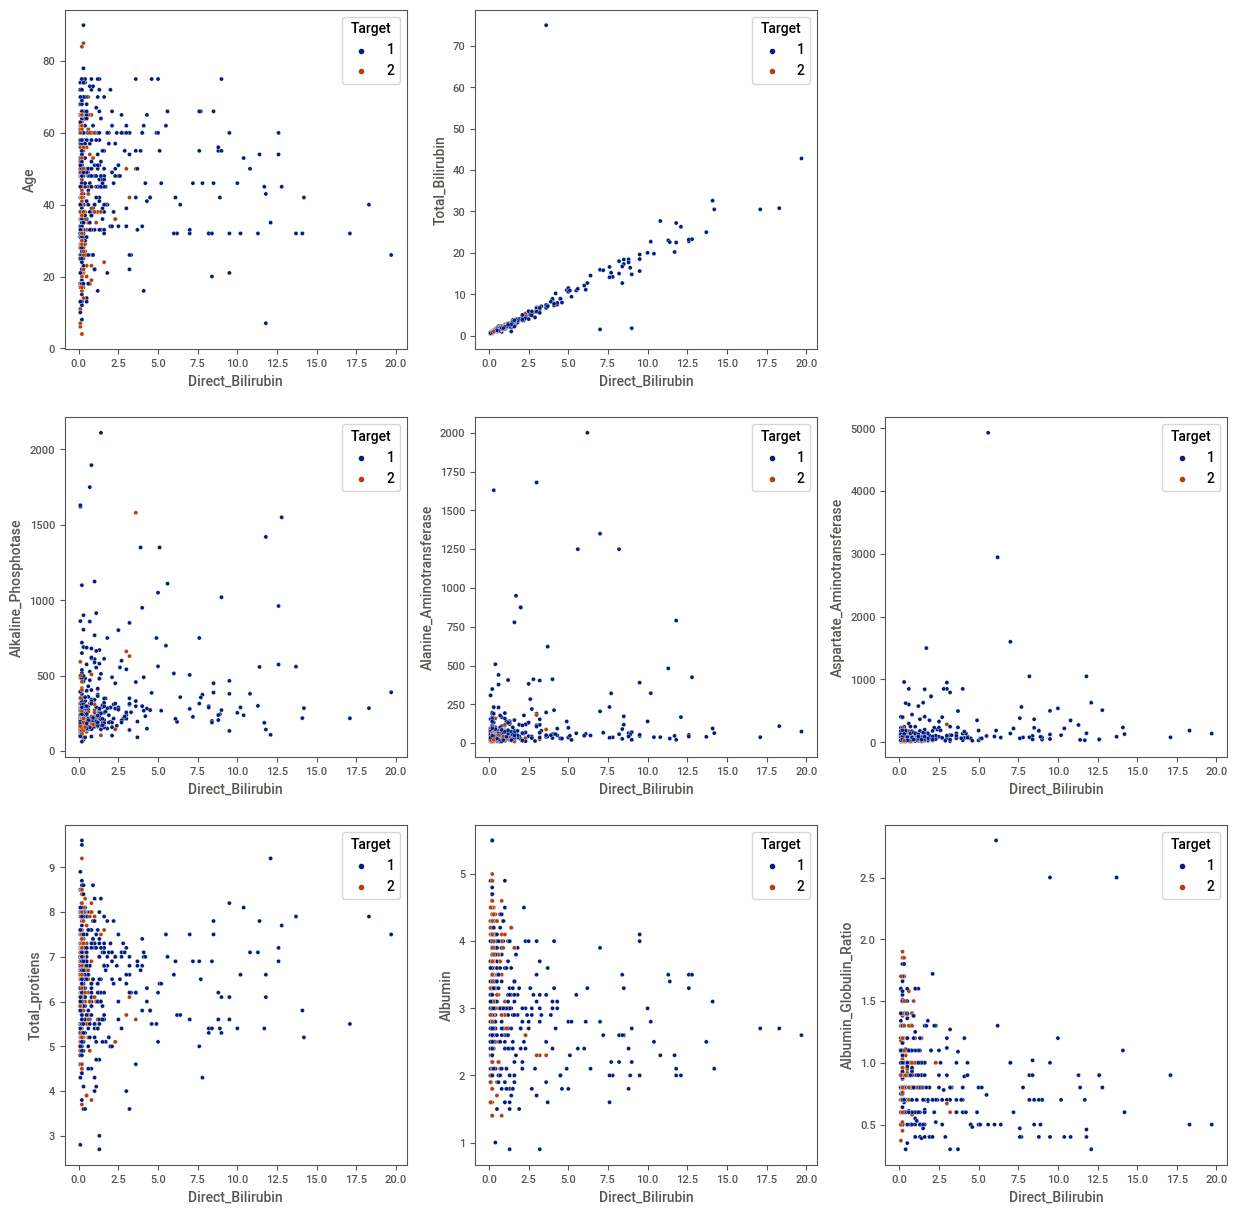

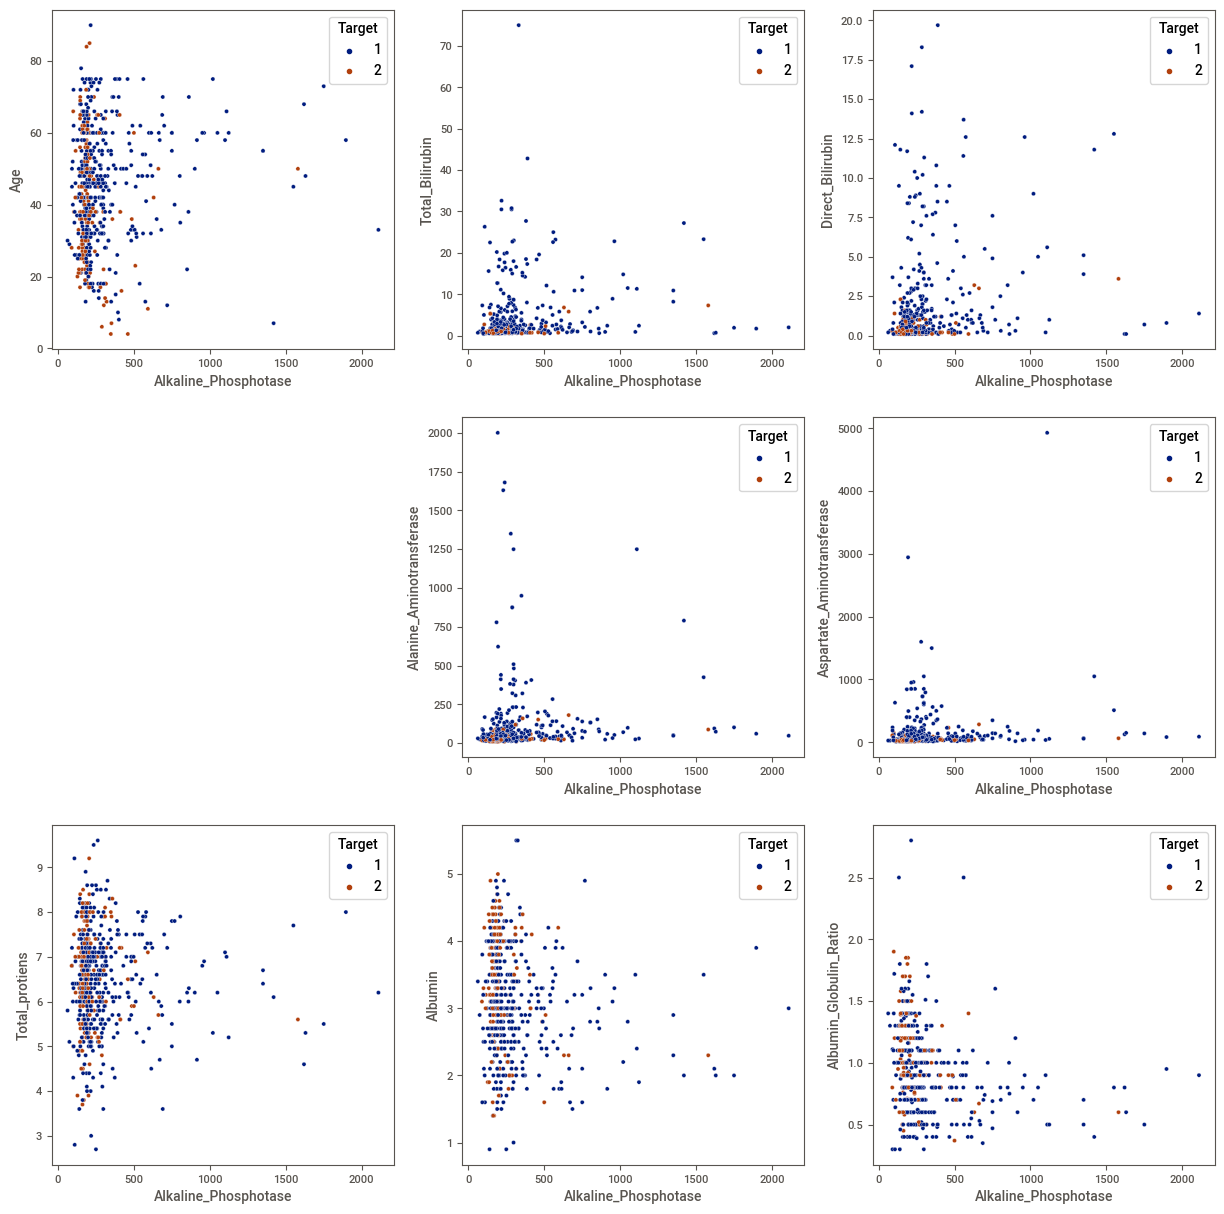

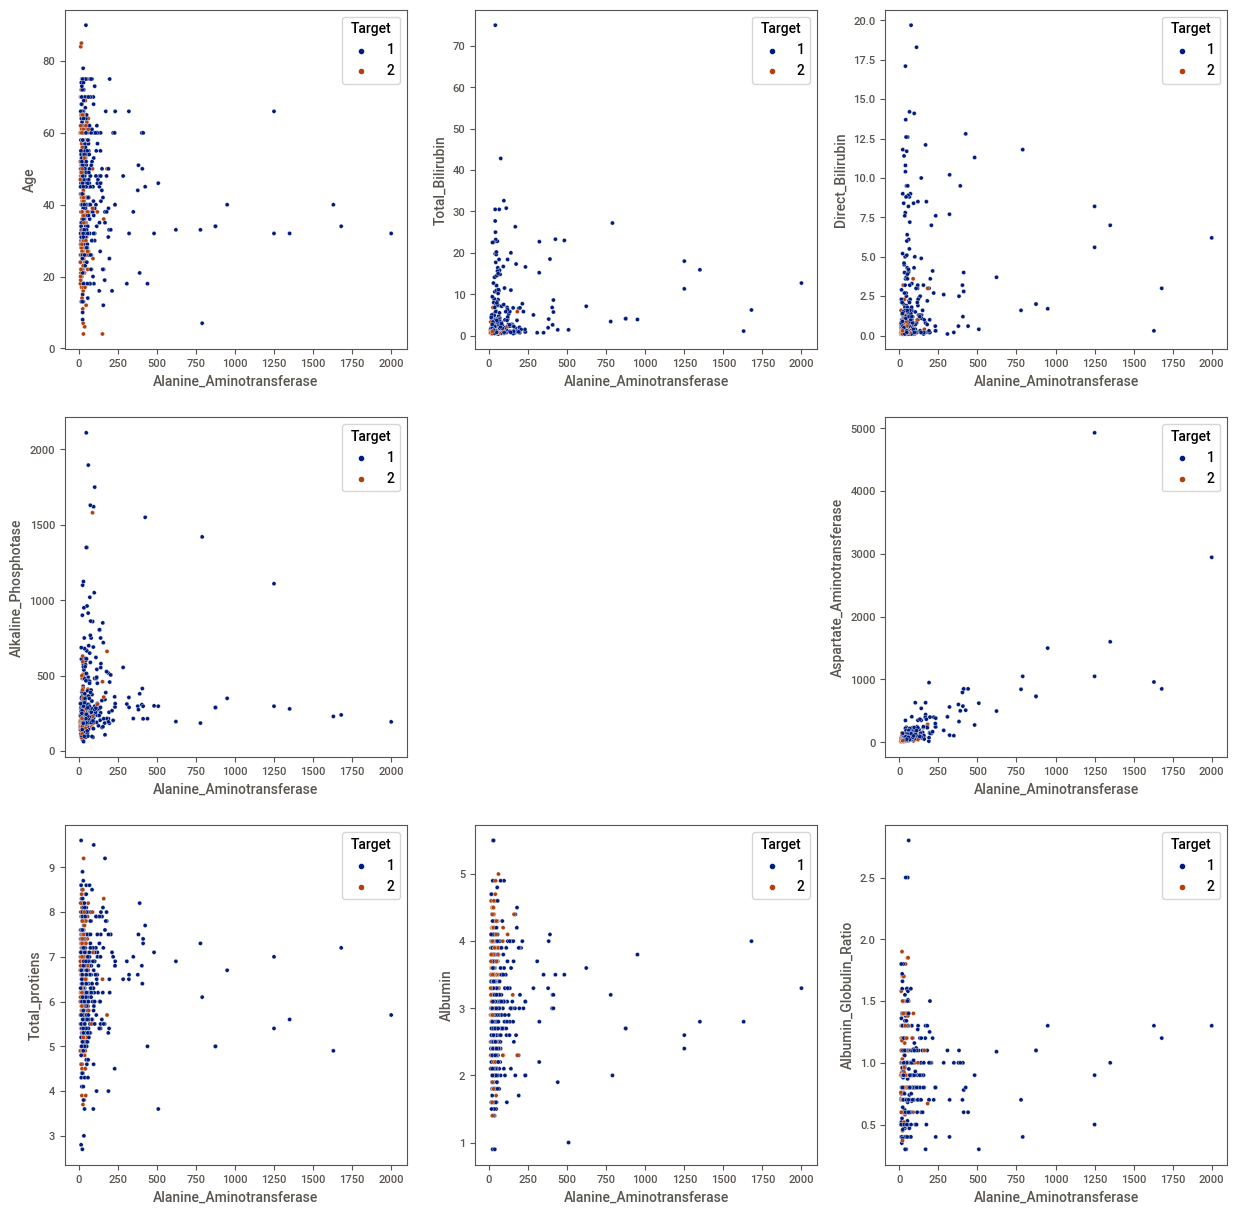

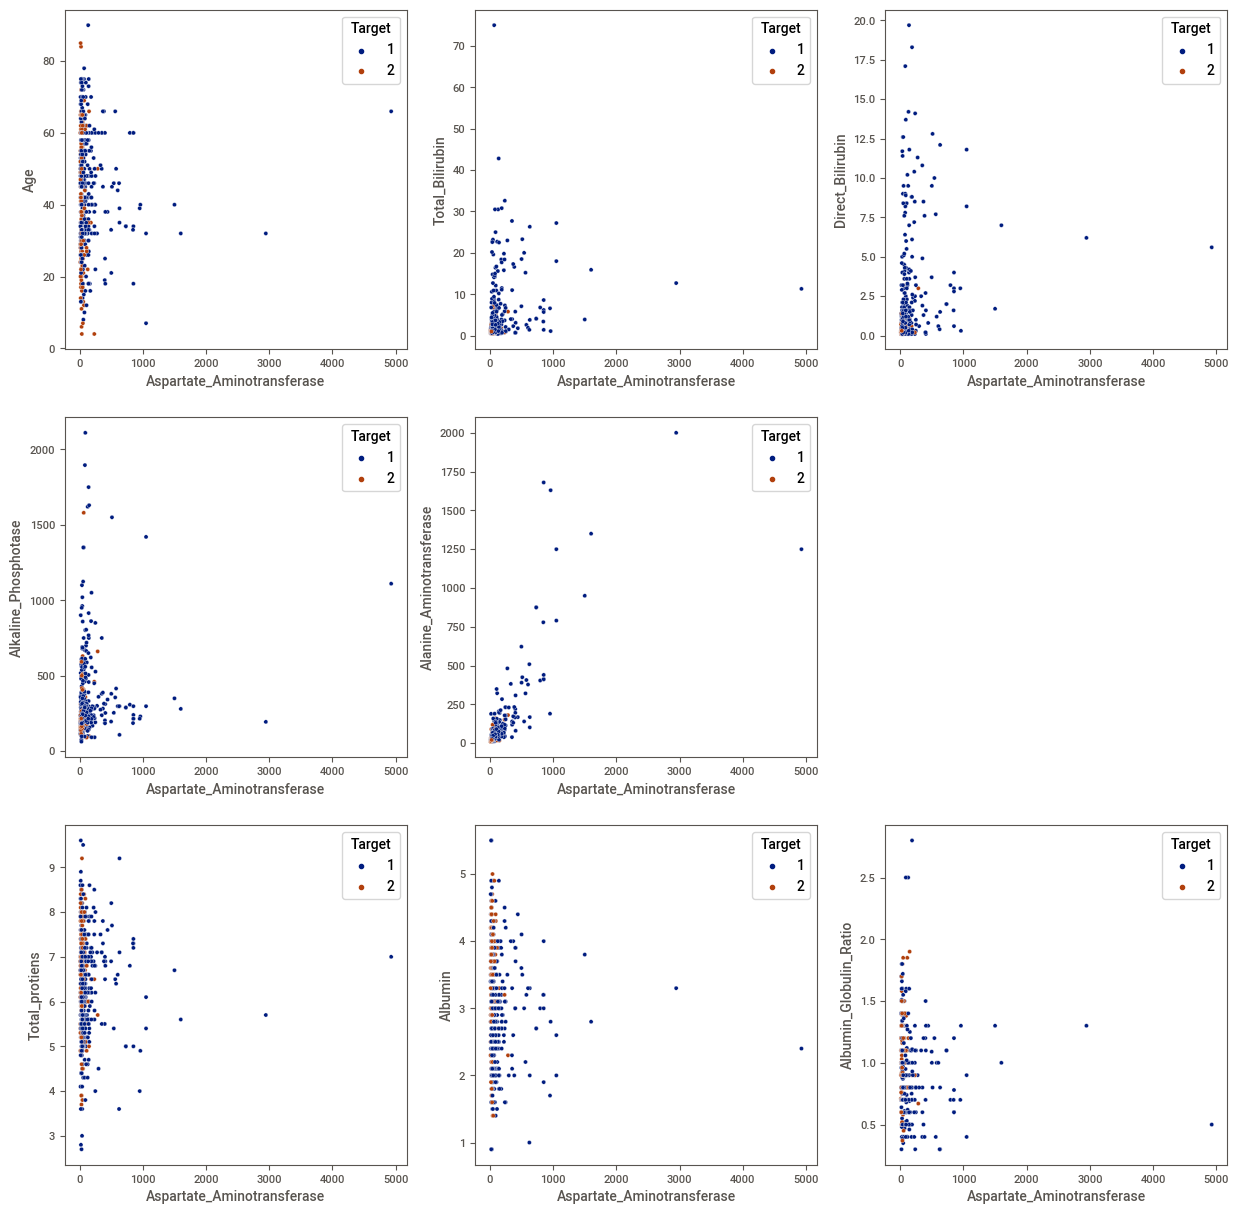

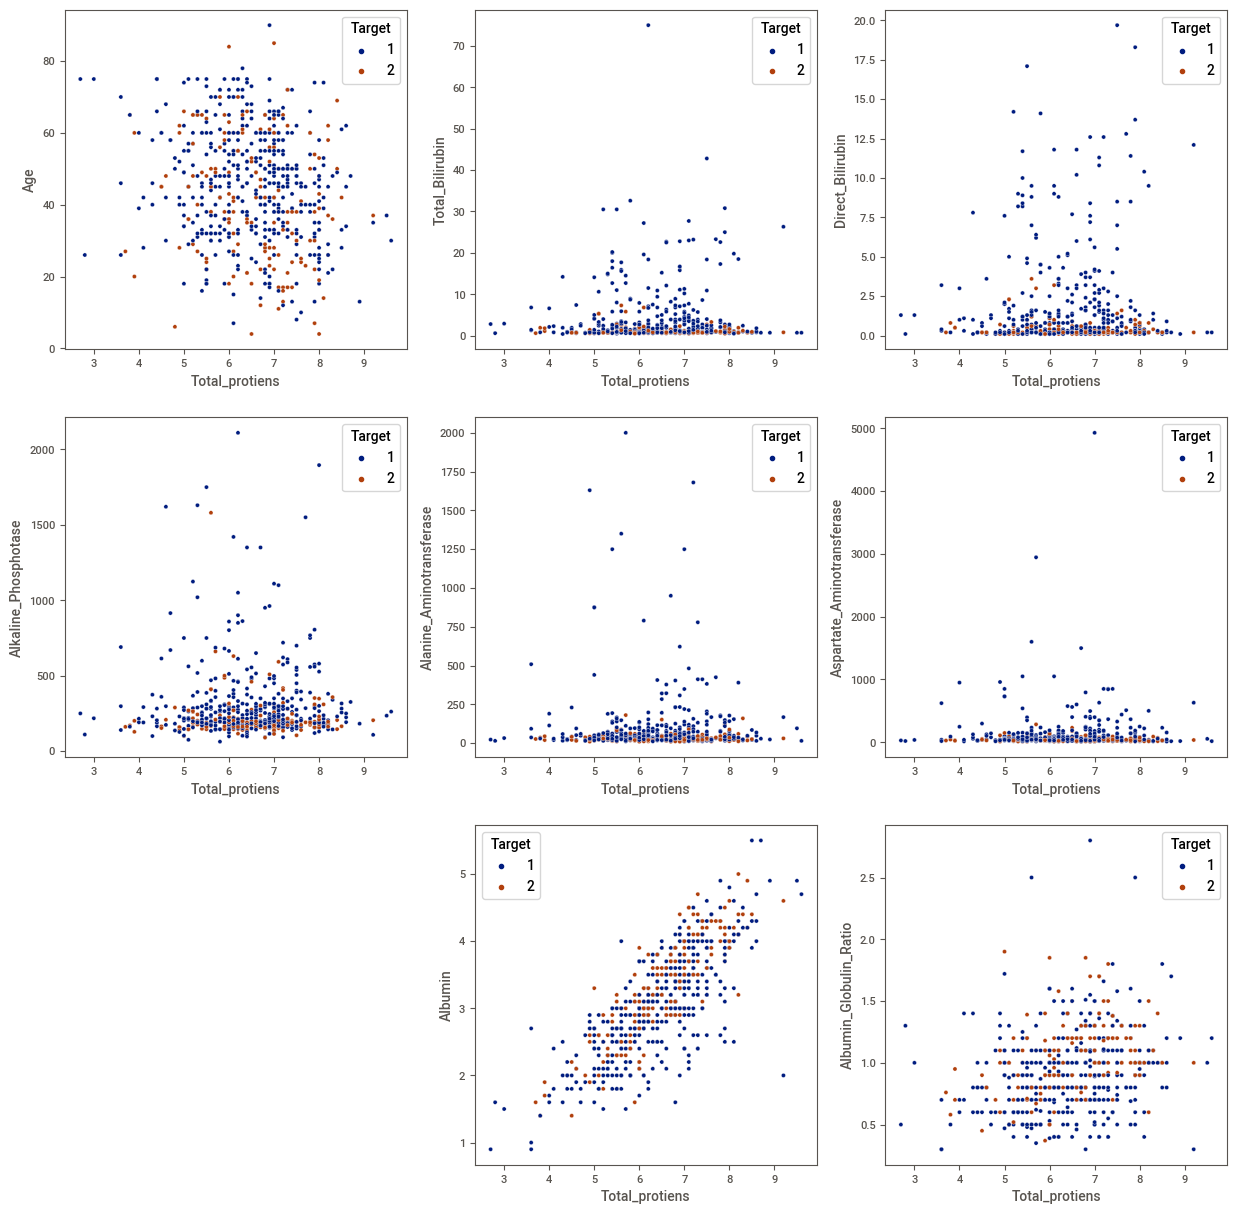

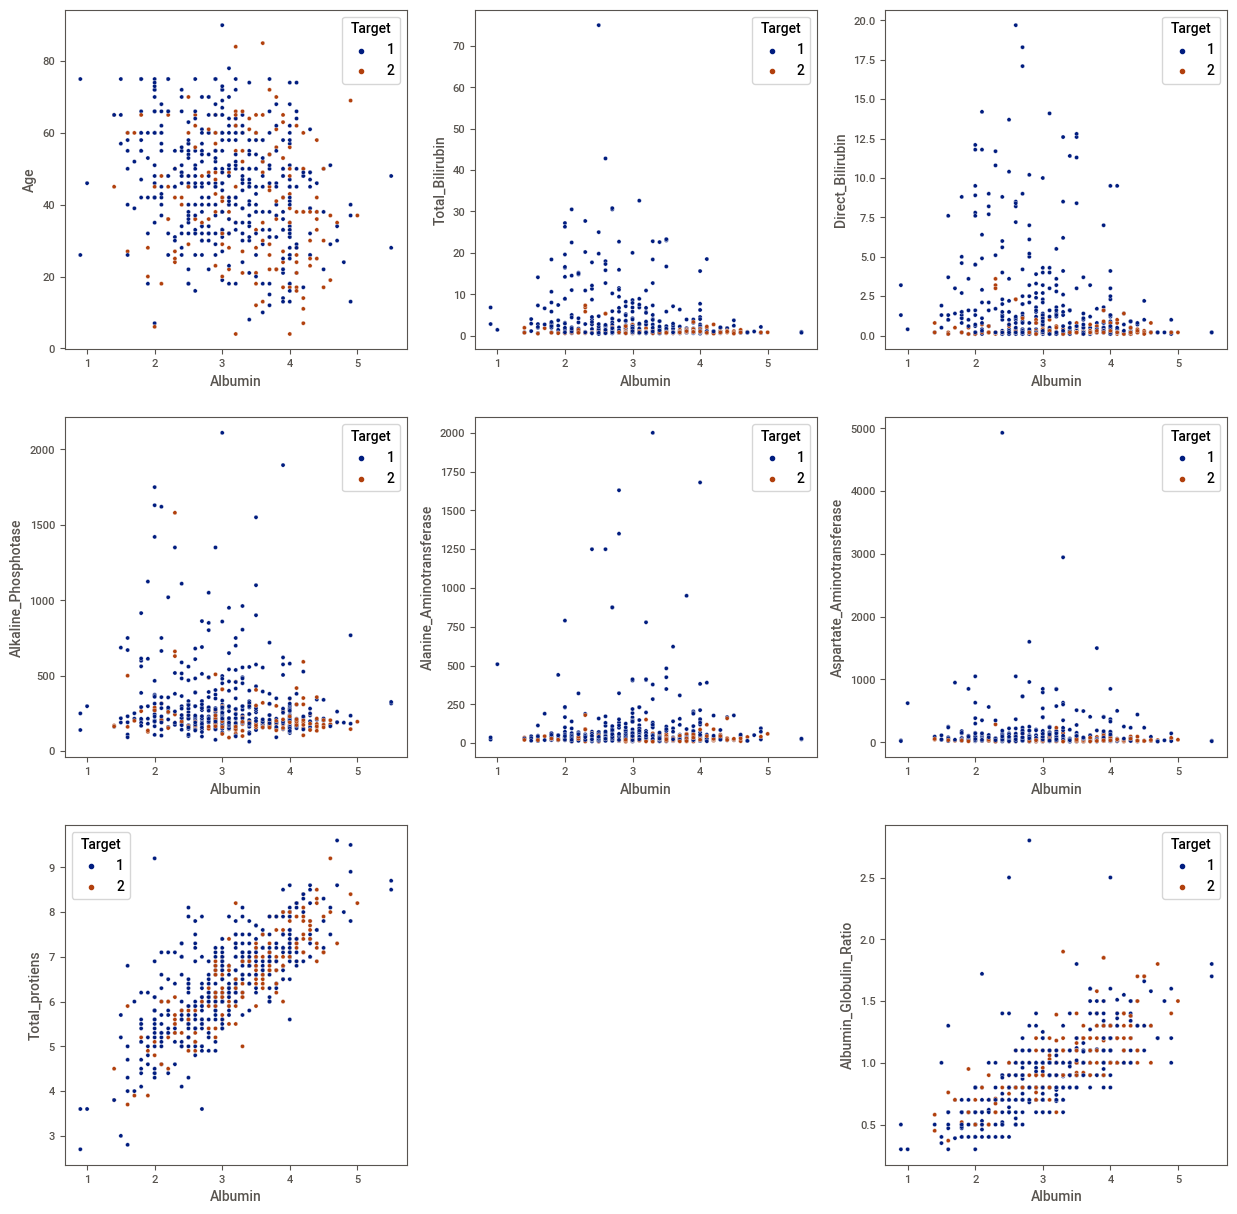

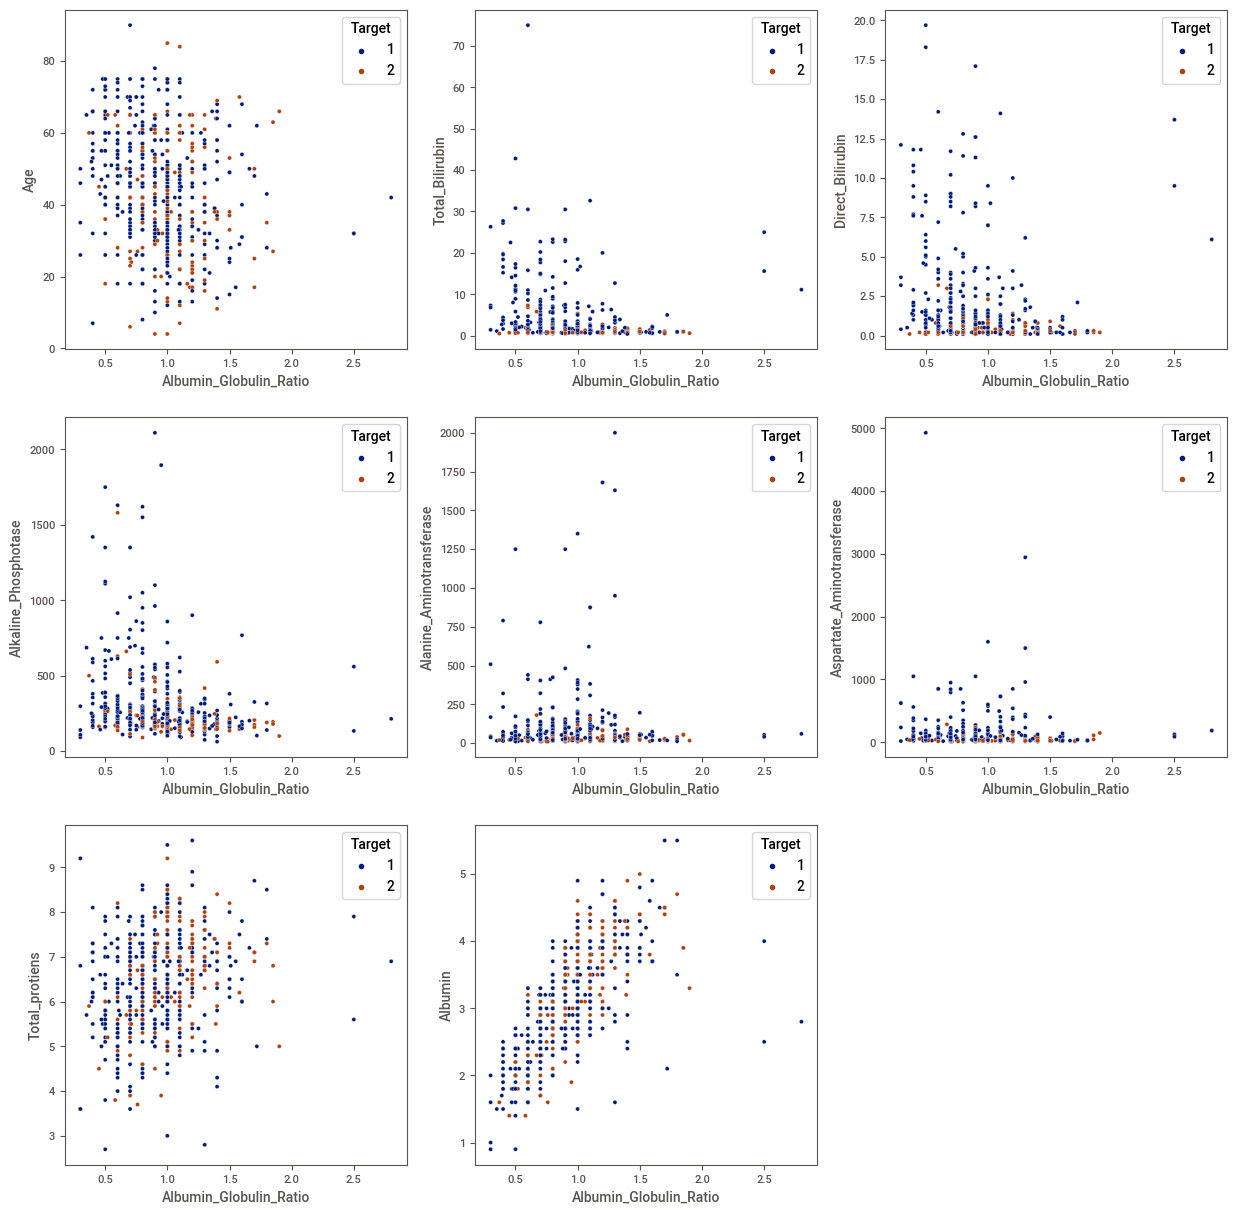

In [16]:
plt_num1 = 1

for column1 in liver_data_num:
  if plt_num1 <=9:
      plt_num2 = 1
      plt.figure(figsize=(15,15))
      for column2 in liver_data_num:
        if plt_num2 <=9:
          if column2 != column1:
            plt.subplot(3,3,plt_num2)
            sns.scatterplot(x=column1,y=column2,data=liver_data , hue="Target" , palette="dark")

        plt_num2+=1
  plt.show()
  plt_num1+=1

### Data pre=processing

In [ ]:
liver_data.drop_duplicates(inplace=True)

In [18]:
liver_data.duplicated().sum()

0

In [19]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_protiens                0
Albumin                       0
Albumin_Globulin_Ratio        0
Target                        0
dtype: int64

#### Convert the categorical value to numerical value

In [20]:
liver_data_gender = pd.get_dummies(liver_data['Gender'], prefix='Male',drop_first=True)

In [21]:
liver_data_gender

,Male_Male
0,0
1,1
2,1
3,1
4,1
...,...
578,1
579,1
580,1
581,1


In [22]:
liver_data_upd = pd.concat([liver_data , liver_data_gender] , axis=1).drop(['Gender'],axis=1)

In [23]:
liver_data_upd.rename(columns={'Male_Male':'Gender'} , inplace=True)

In [24]:
liver_data_upd

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_protiens,Albumin,Albumin_Globulin_Ratio,Target,Gender
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,1


### Split the dataset

In [25]:
 x = liver_data_upd.drop(['Target'] , axis=1)
 y = liver_data_upd['Target']

In [26]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()

x_scl = std_scl.fit_transform(x)
x_scl = pd.DataFrame(x_scl , columns = ['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_photase',
                                        'Alanine_Aminotransferase','Aspartate_Aminotransferase',
                                        'Total_Protiens','Albumin','Albumin_Globulin_Ratio','Gender'])

In [27]:
liver_data_upd_scl = pd.concat([x_scl.reset_index(drop=True) , y.reset_index(drop=True)] , axis=1)

#### Feature selection via correlation

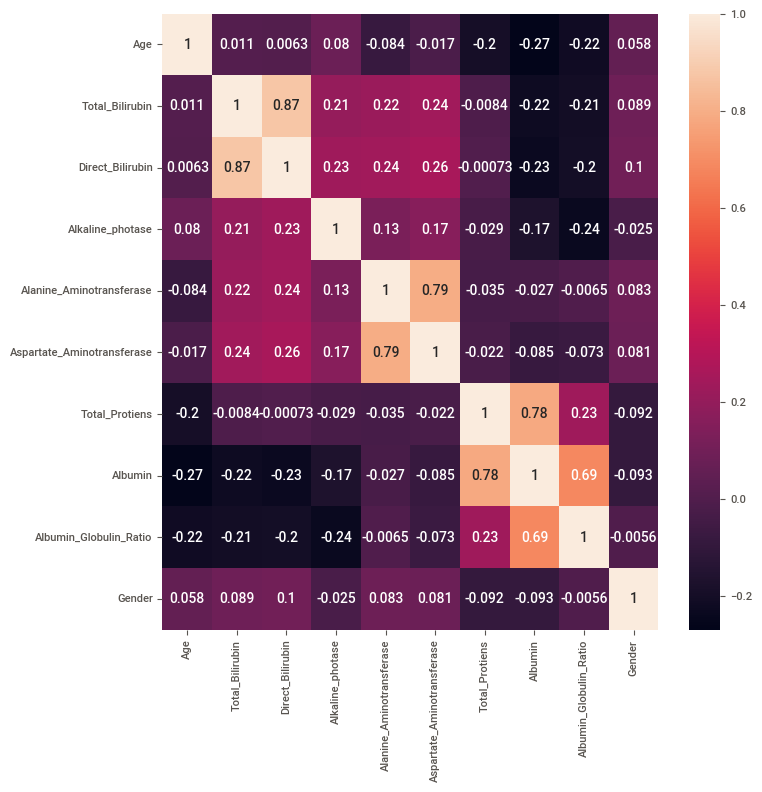

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(x_scl.corr(), annot=True)
plt.show()

### Feature selection - Filter method

#### Variance Threshold

In [29]:
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import VarianceThreshold as vt

x_train_vt , x_test_vt , y_train_vt , y_test_vt = tts(x_scl , y ,test_size=0.2 , random_state=9)
var_thr = vt(threshold=0.1)
var_thr.fit(x_train_vt)
print(var_thr.get_support())
print(sum(var_thr.get_support()))

[ True  True  True  True  True  True  True  True  True  True]
10


#### Correlation coeffcient

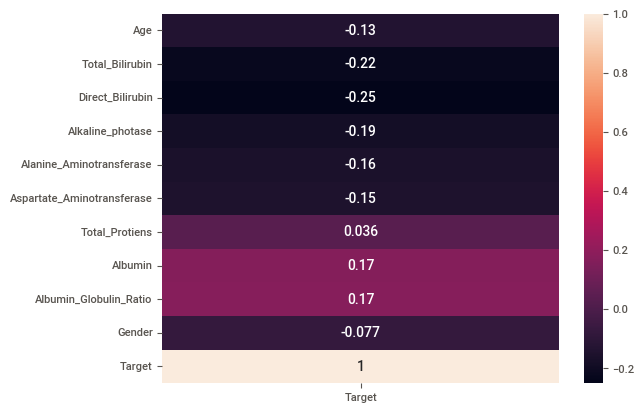

In [30]:
sns.heatmap(liver_data_upd_scl.corr()[["Target"]] , annot=True)
plt.show()

#### check the duplicate value

In [31]:
# from fast_ml.utilities import display_all
# from fast_ml.feature_selection import get_duplicate_features

# get_duplicate_features(liver_data_udp_scl)

#### Information gain

In [32]:
liver_data_dep_list = []

from sklearn.feature_selection import mutual_info_classif

for rand_stat in range(0,101):
  liver_data_dep = mutual_info_classif(x_scl , y , random_state=rand_stat)
  liver_data_dep_df = pd.DataFrame(liver_data_dep , columns=['Dependence'], index=x_scl.columns)
  liver_data_dep_df_col = liver_data_dep_df[liver_data_dep_df['Dependence']==0]
  liver_data_dep_list.append([rand_stat , liver_data_dep_df_col.index])

liver_data_dep_list

[[0, Index(['Total_Protiens'], dtype='object')],
 [1, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [2, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [3, Index(['Albumin_Globulin_Ratio'], dtype='object')],
 [4, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [5, Index(['Total_Protiens'], dtype='object')],
 [6, Index(['Total_Protiens', 'Albumin', 'Gender'], dtype='object')],
 [7, Index(['Total_Protiens', 'Albumin', 'Gender'], dtype='object')],
 [8, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [9, Index(['Total_Protiens', 'Gender'], dtype='object')],
 [10, Index(['Total_Protiens'], dtype='object')],
 [11, Index(['Total_Protiens', 'Albumin', 'Gender'], dtype='object')],
 [12, Index(['Total_Protiens', 'Albumin', 'Gender'], dtype='object')],
 [13, Index(['Albumin', 'Gender'], dtype='object')],
 [14, Index(['Total_Protiens', 'Albumin'], dtype='object')],
 [15, Index(['Total_Protiens', 'Albumin_Globulin_Ratio'], dtype='object')],
 [16, Index(['Total_Protiens

#### Chi2

In [33]:
from sklearn.feature_selection import SelectKBest , chi2

chi2_feat  =SelectKBest(chi2 , k=8)

best_feat = chi2_feat.fit_transform(x,y)
best_feat_ind = chi2_feat.get_support(indices=True)
print(x.columns[[best_feat_ind]])

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alanine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin',
       'Albumin_Globulin_Ratio'],
      dtype='object')


#### Feature Selection - Embedded method

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [35]:
x_train_tb , x_test_tb , y_train_tb , y_test_tb = tts(x_scl , y ,test_size=0.2 , random_state=9)
tb_model = SelectFromModel(RandomForestClassifier(n_estimators=20 , random_state=9))
tb_model.fit(x_train_tb , y_train_tb)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=20,
                                                 random_state=9))

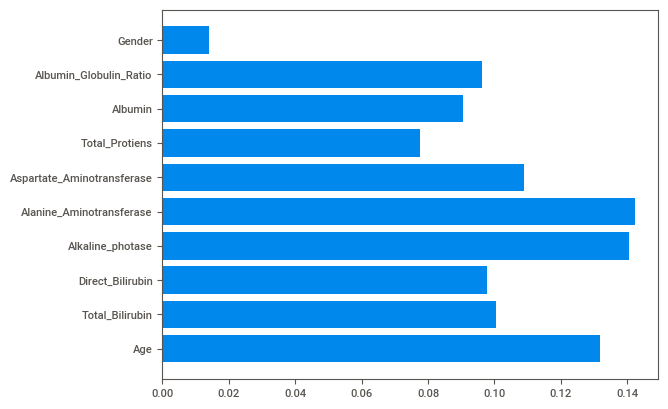

In [36]:
plt.barh(x_scl.columns , tb_model.estimator_.feature_importances_)
plt.show()

In [37]:
x_scl_wog = x_scl.drop("Gender",axis=1)

## Test_train split

In [38]:
x_train , x_test , y_train , y_test = tts(x_scl , y , test_size = 0.2, random_state = 9)

In [39]:
x_train_wog , x_test_wog , y_train_wog , y_test_wog = tts(x_scl_wog , y , test_size = 0.2 , random_state=9)

In [40]:
#### Applying SMOTE to balance the dataset

from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [41]:
x_train_smote , y_train_smote = smote.fit_resample(x_train , y_train)

In [42]:
x_train_wog_smote , y_train_wog_smote = smote.fit_resample(x_train_wog , y_train_wog)

In [43]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

### Model selection and creation

#### Logistics regression

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_smote , y_train_smote)
y_pred_lor = log_reg.predict(x_test)

log_reg_wog = LogisticRegression()
log_reg_wog.fit(x_train_wog_smote ,y_train_wog_smote)
log_pred_wog_lor = log_reg_wog.predict(x_test_wog)

In [45]:
from sklearn.metrics import classification_report , accuracy_score  ,f1_score , precision_score , recall_score

In [46]:
# With all features
cla_rep_lor = classification_report(y_test , y_pred_lor)
acc_sco_lor = accuracy_score(y_test , y_pred_lor)
f1_sco_lor = f1_score(y_test , y_pred_lor)
pre_sco_lor = precision_score(y_test , y_pred_lor)
rec_sco_lor = recall_score(y_test , y_pred_lor)
print(cla_rep_lor)

# without the feature Gender
cla_rep_wog_lor = classification_report(y_test_wog ,log_pred_wog_lor)
acc_sco_wog_lor = accuracy_score(y_test_wog , log_pred_wog_lor)
f1_sco_wog_lor = f1_score(y_test_wog , log_pred_wog_lor)
pre_sco_wog_lor = precision_score(y_test_wog , log_pred_wog_lor)
rec_sco_wog_lor = recall_score(y_test_wog , log_pred_wog_lor)
print(cla_rep_wog_lor)

              precision    recall  f1-score   support

           1       0.86      0.63      0.73        78
           2       0.49      0.78      0.60        36

    accuracy                           0.68       114
   macro avg       0.68      0.70      0.66       114
weighted avg       0.74      0.68      0.69       114

              precision    recall  f1-score   support

           1       0.88      0.63      0.73        78
           2       0.50      0.81      0.62        36

    accuracy                           0.68       114
   macro avg       0.69      0.72      0.67       114
weighted avg       0.76      0.68      0.70       114



#### KNN

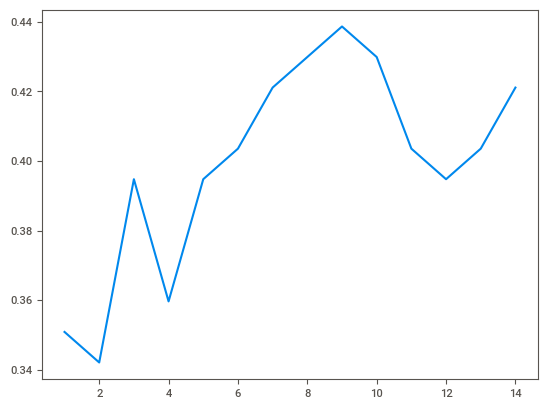

In [47]:
from sklearn.neighbors import KNeighborsClassifier

err_rate = []

for neighbor in range(1,15):
  knn_cla = KNeighborsClassifier(n_neighbors = neighbor)
  knn_cla.fit(x_train_smote , y_train_smote)
  y_pred_knn_init = knn_cla.predict(x_test)
  err_rate.append(np.mean(y_pred_knn_init != y_test))

plt.plot(range(1,15), err_rate)
plt.show()

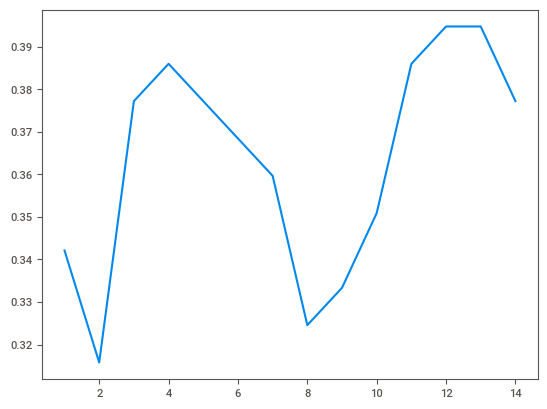

In [48]:
err_rate_wog = []

for neighbor in range(1, 15):

  knn_cla_wog = KNeighborsClassifier(n_neighbors = neighbor)
  knn_cla_wog.fit(x_train_wog_smote , y_train_wog_smote)
  y_pred_knn_wog_init = knn_cla_wog.predict(x_test_wog)
  err_rate_wog.append(np.mean(y_pred_knn_wog_init != y_test_wog))

plt.plot(range(1,15) , err_rate_wog)
plt.show()

ELbow point not visible in the KNN method. Probably duw to less data hence skipping thus method

#### SVM

In [49]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001 , 0.01 ,  0.1 , 1 , 2],
              'gamma': [0.0001 ,0.001 , 0.01 , 0.1 ,1],
              'random_state' : list(range(0,100))}

svc_hpt = SVC()
grid = GridSearchCV(svc_hpt , param_grid , refit=True , verbose=1 , scoring='f1' , cv=5)

grid.fit(x,y)

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 2],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             scoring='f1', verbose=1)

In [ ]:
# with all feature
svm_cla = SVC(C=1 , gamma=0.0001 , random_state=0)
svm_cla.fit(x_train_smote , y_train_smote)

y_pred_svm = svm_cla.predict(x_test)

cla_rep_svm = classification_report(y_test , y_pred_svm)
acc_sco_svm = accuracy_score(y_test , y_pred_svm)
f1_sco_svm = f1_score(y_test , y_pred_svm)
pre_sco_svm = precision_score(y_test ,  y_pred_svm)
rec_sco_svm = recall_score(y_test ,y_pred_svm)
print(cla_rep_svm)

# without the feature "Gender"

svm_cla_wog = SVC(C=1 , gamma=0.0001 , random_state=0)
svm_cla_wog.fit(x_train_wog_smote , y_train_wog_smote)

y_pred_wog_svm = svm_cla_wog.predict(x_test_wog)

cla_rep_wog_svm = classification_report(y_test_wog , y_pred_wog_svm)
acc_sco_wog_svm = accuracy_score(y_test_wog , y_pred_wog_svm)
f1_sco_wog_svm = f1_score(y_test_wog , y_pred_wog_svm)
pre_sco_wog_svm = precision_score(y_test_wog ,  y_pred_wog_svm)
rec_sco_wog_svm = recall_score(y_test_wog ,y_pred_wog_svm)
print(cla_rep_wog_svm)

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid_dec_tree = {
    "criterion": ["gini","entropy"],
    "splitter" : ["best", "random"],
    "max_depth": (list(range(1,20))),
    "min_samples_split": [2,3,4,5],
    "min_samples_leaf": (list(range(1,20)))
}

dec_tree_gscv = DecisionTreeClassifier()
dec_tree_cv = GridSearchCV(dec_tree_gscv , param_grid_dec_tree , scoring='f1',
                           refit=True , verbose=1 , cv=3 , n_jobs=-1)

dec_tree_cv.fit(x_train_smote , y_train_smote)

print(dec_tree_cv.best_params_)
print(dec_tree_cv.best_score_)

In [ ]:
## with all features

dec_tree_best = DecisionTreeClassifier(criterion='gini',max_depth=16, min_samples_leaf=2,
                                       min_samples_split=2 , splitter='random')
dec_tree_best.fit(x_train_smote , y_train_smote)

y_pred_dec_tree = dec_tree_best.predict(x_test)

cla_rep_dec_tree = classification_report(y_test , y_pred_dec_tree)
acc_sco_dec_tree = accuracy_score(y_test ,y_pred_dec_tree)
f1_sco_dec_tree = f1_score(y_test , y_pred_dec_tree)
pre_sco_dec_tree = precision_score(y_test , y_pred_dec_tree)
rec_sco_dec_tree = recall_score(y_test,  y_pred_dec_tree)
print(cla_rep_dec_tree)



In [ ]:
## Without Gender

param_grid_dec_tree_wog = {
    "criterion": ["gini","entropy"],
    "splitter": ["best","random"],
    "max_depth": (list(range(1,20))),
    "min_samples_split": [2,3,4,5],
    "min_samples_leaf": (list(range(1,20)))
}

dec_tree_wog_gscv = DecisionTreeClassifier()

dec_tree_wog_cv = GridSearchCV(dec_tree_wog_gscv , param_grid_dec_tree_wog , scoring='f1',
                               refit=True , verbose=1 , cv=3 , n_jobs=-1)

dec_tree_wog_cv.fit(x_train_wog_smote , y_train_wog_smote)

print(dec_tree_wog_cv.best_params_)
print(dec_tree_wog_cv.best_score_)

In [ ]:
dec_tree_wog_best = DecisionTreeClassifier(criterion='entropy', max_depth=18,min_samples_leaf=1,
                                           min_samples_split=3 ,splitter='best')
dec_tree_wog_best.fit(x_train_wog_smote , y_train_wog_smote)

y_pred_wog_dec_tree = dec_tree_wog_best.predict(x_test_wog)

cla_rep_wog_dec_tree = classification_report(y_test ,y_pred_wog_dec_tree)
acc_sco_wog_dec_tree = accuracy_score(y_test ,y_pred_wog_dec_tree)
f1_sco_wog_dec_tree = f1_score(y_test ,y_pred_wog_dec_tree)
pre_sco_wog_dec_tree = precision_score(y_test ,y_pred_wog_dec_tree)
rec_sco_wog_dec_tree = recall_score(y_test,  y_pred_wog_dec_tree)
print(cla_rep_wog_dec_tree)

#### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(200,2000,10)]
max_features = ["sqrt","log2",None]
max_depth = [int(y) for y in np.linespace(start=10 , stop=110 , num=10)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True , False]

rand_frst_param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# With all features
rand_frst_rfcv = RandomForestClassifier(random_state=9)
rand_frst_cv = RandomizedSearchCV(estimator=rand_frst_rfcv , scoring='f1',param_distributions =rand_frst_param_grid,
                                  n_iter = 100 , n_jobs=-1 , verbose=3 , random_state=9)

rand_frst_cv.fit(x_train_smote , y_train_smote)
print("Best parameters for all features: ", rand_frst_cv.best_params_)

# without the feature "gender"
rand_frst_rfcv_wog = RandomForestClassifier(random_state=9)
rand_frst_cv_wog = RandomizedSearchCV(estimator=rand_frst_rfcv_wog , scoring='f1' , param_distributions=rand_frst_param_grid,
                                      n_iter=100 , n_jobs=-1 , verbose=3 , cv=3 , random_state=9)

rand_frst_cv_wog.fit(x_train_wog_smote , y_train_wog_smote)
print("Best parameters for all features wihtout Gender: ", rand_frst_cv_wog.best_params_)


In [58]:
# With all features
rand_frst_bp = RandomForestClassifier(n_estimators = 400 , min_samples_split=5 ,
                                      min_samples_leaf=1,
                                      max_features="sqrt",max_depth=76 , bootstrap=False , random_state=9)
rand_frst_bp.fit(x_train_smote  ,y_train_smote)

y_pred_ran_frst = rand_frst_bp.predict(x_test)

cla_rep_ran_frst = classification_report(y_test , y_pred_ran_frst)
acc_sco_ran_frst = accuracy_score(y_test ,y_pred_ran_frst)
f1_sco_ran_frst = f1_score(y_test , y_pred_ran_frst)
pre_sco_ran_frst = precision_score(y_test , y_pred_ran_frst)
rec_sco_ran_frst = recall_score(y_test , y_pred_ran_frst)
print(cla_rep_ran_frst)

              precision    recall  f1-score   support

           1       0.74      0.85      0.79        78
           2       0.52      0.36      0.43        36

    accuracy                           0.69       114
   macro avg       0.63      0.60      0.61       114
weighted avg       0.67      0.69      0.68       114



In [59]:
# Without all features

rand_frst_bp_wog = RandomForestClassifier(n_estimators = 400 , min_samples_split=5 ,
                                      min_samples_leaf=1,
                                      max_features="sqrt",max_depth=76 , bootstrap=False , random_state=9)
rand_frst_bp_wog.fit(x_train_wog_smote  ,y_train_wog_smote)

y_pred_wog_ran_frst = rand_frst_bp_wog.predict(x_test_wog)

cla_rep__wog_ran_frst = classification_report(y_test_wog , y_pred_wog_ran_frst)
acc_sco_wog_ran_frst = accuracy_score(y_test_wog ,y_pred_wog_ran_frst)
f1_sco_wog_ran_frst = f1_score(y_test_wog , y_pred_wog_ran_frst)
pre_sco_wog_ran_frst = precision_score(y_test_wog , y_pred_wog_ran_frst)
rec_sco_wog_ran_frst = recall_score(y_test_wog , y_pred_wog_ran_frst)
print(cla_rep_ran_frst)

              precision    recall  f1-score   support

           1       0.74      0.85      0.79        78
           2       0.52      0.36      0.43        36

    accuracy                           0.69       114
   macro avg       0.63      0.60      0.61       114
weighted avg       0.67      0.69      0.68       114



#### Gradient boosting

In [64]:
x_train_gb , x_test_gb , y_train_gb , y_test_gb = tts(x ,y ,test_size=0.2 , random_state=9)

x_train_wog_gb , x_test_wog_gb , y_train_wog_gb , y_test_wog_gb = tts(x.drop(["Gender"] , axis=1) , y, test_size=0.2 , random_state=9)

x_train_gb_smote , y_train_wog_smote = smote.fit_resample(x_train_gb , y_train_gb)

x_train_wog_gb_smote , y_train_wog_gb_smote = smote.fit_resample(x_train_wog_gb , y_train_wog_gb)


In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_smote = GradientBoostingClassifier()
gbc_smote.fit(x_train_gb_smote , y_train_gb_smote)

y_pred_gra_bost = gbc_smote.predict(x_test_gb)

cla_rep_gra_bost = classification_report(y_test_gb , y_pred_gra_bost)
acc_sco_gra_bost = accuracy_score(y_test_gb ,y_pred_gra_bost)
f1_sco_gra_bost = f1_score(y_test_gb , y_pred_gra_bost)
pre_sco_gra_bost = precision_score(y_test_gb ,  y_pred_gra_bost)
rec_sco_gra_bost = recall_score(y_test_gb ,  y_pred_gra_bost)
print(cla_rep_gra_bost)

              precision    recall  f1-score   support

           1       0.74      0.78      0.76        78
           2       0.47      0.42      0.44        36

    accuracy                           0.67       114
   macro avg       0.61      0.60      0.60       114
weighted avg       0.66      0.67      0.66       114



In [66]:
# Without the feature "Gender"

gbc_wog_smote = GradientBoostingClassifier()
gbc_wog_smote.fit(x_train_wog_gb_smote , y_train_wog_gb_smote)

y_pred_wog_gra_bost = gbc_wog_smote.predict(x_test_wog_gb)

cla_rep_wog_gra_bost = classification_report(y_test_gb , y_pred_wog_gra_bost)
acc_sco_wog_gra_bost = accuracy_score(y_test_gb , y_pred_wog_gra_bost)
f1_sco_wog_gra_bost = f1_score(y_test_gb , y_pred_wog_gra_bost)
pre_sco_wog_gra_bost = precision_score(y_test_gb , y_pred_wog_gra_bost)
rec_sco_wog_gra_bost = recall_score(y_test_gb , y_pred_wog_gra_bost)
print(cla_rep_wog_gra_bost)

              precision    recall  f1-score   support

           1       0.75      0.77      0.76        78
           2       0.47      0.44      0.46        36

    accuracy                           0.67       114
   macro avg       0.61      0.61      0.61       114
weighted avg       0.66      0.67      0.66       114



#### ANN

In [68]:
from sklearn.neural_network import MLPClassifier

In [70]:
# With all features

ann_smote = MLPClassifier(hidden_layer_sizes=(50,3),
                          learning_rate_init=0.1,
                          max_iter=100,
                          random_state=9)

ann_smote.fit(x_train_gb_smote ,  y_train_gb_smote)
y_pred_ann = ann_smote.predict(x_test_gb)

cla_rep_ann = classification_report(y_test_gb , y_pred_ann)
acc_sco_ann = accuracy_score(y_test_gb , y_pred_ann)
f1_sco_ann = f1_score(y_test_gb ,  y_pred_ann)
pre_sco_ann = precision_score(y_test_gb , y_pred_ann)
rec_sco_ann = recall_score(y_test_gb , y_pred_ann)

print("With all parameters:")
print(cla_rep_ann)

With all parameters:
              precision    recall  f1-score   support

           1       0.68      1.00      0.81        78
           2       0.00      0.00      0.00        36

    accuracy                           0.68       114
   macro avg       0.34      0.50      0.41       114
weighted avg       0.47      0.68      0.56       114



In [72]:
# Without the feature "gender"

ann_wog_smote = MLPClassifier(hidden_layer_sizes=(50,3),
                              learning_rate_init=0.1,
                              max_iter=100,
                              random_state=9)

ann_wog_smote.fit(x_train_wog_gb_smote , y_train_wog_gb_smote)

y_pred_wog_ann = ann_wog_smote.predict(x_test_wog_gb)

cla_rep_wog_ann = classification_report(y_test_wog_gb , y_pred_wog_ann)
acc_sco_wog_ann = accuracy_score(y_test_wog_gb , y_pred_wog_ann)
f1_sco_wog_ann = f1_score(y_test_wog_gb , y_pred_wog_ann)
pre_sco_wog_ann = precision_score(y_test_wog_gb , y_pred_wog_ann)
rec_sco_wog_ann = recall_score(y_test_wog_gb , y_pred_wog_ann)

print("Without Gender:")
print(cla_rep_wog_ann)

Without Gender:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        78
           2       0.32      1.00      0.48        36

    accuracy                           0.32       114
   macro avg       0.16      0.50      0.24       114
weighted avg       0.10      0.32      0.15       114



#### Model comparison and evaluation

In [73]:
liver_data_metrics = {
    "Model": ["Logistic Regression(All features)","Logistic Regression(without Gender)",
              "SVM(All features)","SVM(without gender)",
              "Decision Tree(ALL features)","Decision Tree(without Gender)",
              "Random Forest(All features)","Random Forest(without Gender)",
              "Gradient Boosting(All features)","Gradient Boosting(Without Gender)",
              "ANN(Without Gender)"],
    "Accuracy" : [acc_sco_lor , acc_sco_wog_lor , acc_sco_svm , acc_sco_wog_svm,
                  acc_sco_dec_tree , acc_sco_wog_dec_tree , acc_sco_ran_frst, acc_sco_wog_ran_frst,
                  acc_sco_gra_bost , acc_sco_wog_gra_bost , acc_sco_wog_ann],
    "F1_score" : [f1_sco_lor , f1_sco_wog_lor , f1_sco_svm , f1_sco_wog_svm ,
                  f1_sco_dec_tree , f1_sco_wog_dec_tree , f1_sco_ran_frst , f1_sco_wog_ran_frst ,
                  f1_sco_gra_bost , f1_sco_wog_gra_bost , f1_sco_wog_ann],
    "Precision" : [pre_sco_lor , pre_sco_wog_lor , pre_sco_svm , pre_sco_wog_svm,
                   pre_sco_dec_tree , pre_sco_wog_dec_tree , pre_sco_ran_frst , pre_sco_wog_ran_frst,
                   pre_sco_gra_bost , pre_sco_wog_gra_bost , pre_sco_wog_ann],
    "Recall"    : [rec_sco_lor , rec_sco_wog_lor , rec_sco_svm , rec_sco_wog_svm,
                   rec_sco_dec_tree , rec_sco_wog_dec_tree , rec_sco_ran_frst , rec_sco_wog_ran_frst,
                   rec_sco_gra_bost , rec_sco_wog_gra_bost , rec_sco_wog_ann]
}

In [74]:
liver_data_metrics_df = pd.DataFrame(liver_data_metrics)
liver_data_metrics_df.set_index("Model" , inplace=True)
liver_data_metrics_df = (liver_data_metrics_df * 100).round(2)

In [75]:
print(liver_data_metrics_df)

                                     Accuracy  F1_score  Precision  Recall
Model                                                                     
Logistic Regression(All features)       67.54     72.59      85.96   62.82
Logistic Regression(without Gender)     68.42     73.13      87.50   62.82
SVM(All features)                       43.86     30.43     100.00   17.95
SVM(without gender)                     43.86     30.43     100.00   17.95
Decision Tree(ALL features)             68.42     77.22      76.25   78.21
Decision Tree(without Gender)           64.91     75.61      72.09   79.49
Random Forest(All features)             69.30     79.04      74.16   84.62
Random Forest(without Gender)           63.16     75.29      69.57   82.05
Gradient Boosting(All features)         66.67     76.25      74.39   78.21
Gradient Boosting(Without Gender)       66.67     75.95      75.00   76.92
ANN(Without Gender)                     31.58      0.00       0.00    0.00
